# Εργασια 2

Κοροβέσης Παναγιώτης 
ΑΜ: 1115201700056

Γρηγορίου Κωνσταντίνα
ΑΜ: 1115201700025

In [29]:
#imports
import sys
import pandas as pd
import glob, os
import numpy as np
from sklearn import cluster
from sklearn import preprocessing
from sklearn.decomposition import PCA
from nltk.cluster.util import cosine_distance 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.model_selection as model_selection
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
import matplotlib 

In [2]:
def fill_df(df, category, Location, IDcounter):
    
    all_files = glob.glob(Location)
    
    for file in all_files:

        f = open(file, 'r')
        text = f.read()
        #text = text.replace("\n", ' ')
        #text = text.replace("  ", '\n', 1)

        #print (text)
        t1, t2 = text.split('\n', 1)
        #remove end newlines
        t1 = t1.rstrip()
        t2 = t2.rstrip()
        df = df.append({'title' : t1, 'content' : t2, 'category' : category, 'id' : IDcounter}, ignore_index=True)
        #df1 = pd.read_csv(file, sep='\n', low_memory=False, names = ['title', 'content'])
        #print (df1)
        IDcounter += 1

    #return the correct values
    return df, IDcounter

In [3]:
#create a dataframe
df = pd.DataFrame(columns = ['title','content', 'category', 'id'])


#all_files = glob.glob(Location)
#create an empty dataframe

#start to fill it
counter = 1

#business files first
Location = r'C:\Users\panos_korovesis\Desktop\DI\6ο εξαμηνο\ΤΕΔ\2η εργασια\fulltext\data\business\*.txt'
#call the function
df, counter = fill_df(df, 'business', Location, counter)

#continue with entertainment
Location = r'C:\Users\panos_korovesis\Desktop\DI\6ο εξαμηνο\ΤΕΔ\2η εργασια\fulltext\data\entertainment\*.txt'
df, counter = fill_df(df, 'entertainment', Location, counter)

#continue with politics
Location = r'C:\Users\panos_korovesis\Desktop\DI\6ο εξαμηνο\ΤΕΔ\2η εργασια\fulltext\data\politics\*.txt'
df, counter = fill_df(df, 'politics', Location, counter)

#continue with sport
Location = r'C:\Users\panos_korovesis\Desktop\DI\6ο εξαμηνο\ΤΕΔ\2η εργασια\fulltext\data\sport\*.txt'
df, counter = fill_df(df, 'sport', Location, counter)

#continue with tech
Location = r'C:\Users\panos_korovesis\Desktop\DI\6ο εξαμηνο\ΤΕΔ\2η εργασια\fulltext\data\tech\*.txt'
df, counter = fill_df(df, 'tech', Location, counter)
    
#print(df.head(511))

In [33]:
#create train and test dataframes

X = df
y = df[['id', 'title', 'content']]

#print (X.head(1))
#print (y.head(1))

X_trainDF, X_test, y_train, y_testDF = model_selection.train_test_split(X, y, test_size = 0.2, stratify = df['category'], random_state = 34)

#print(y_test)
#print(X_train)

In [34]:
#create the files
X_trainDF.to_csv('train.tsv', sep = '\t')
y_testDF.to_csv('test.tsv', sep = '\t')

# **1.** Δημιουργία WordCloud καθε κατηγοριας

In [116]:
def createWordCloud(df, category, color):
    
    #get said category
    new = df[(df['category'] == category)]

    # create a text with all the columns
    text = " ".join(n for n in new['content'])
    
    #create stopword list
    sw = stopwords.words("english")
    sw.append('said')
    sw.append('also')
    sw.append('would')
    sw.append('could')
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=sw , background_color = color).generate(text)

    # Display the generated image:
    print (category ,"WordCloud")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    plt.show()

business WordCloud


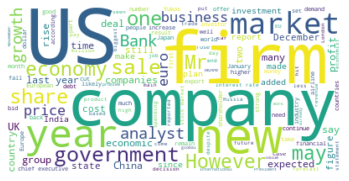

In [117]:
#create business wordcloud

#simply call the created function
createWordCloud(df, 'business', '#ffffff')

politics WordCloud


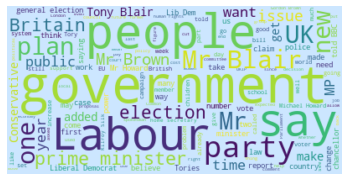

In [118]:
#create politics wordcloud

#simply call the created function
createWordCloud(df, 'politics', '#cce6ff')

sport WordCloud


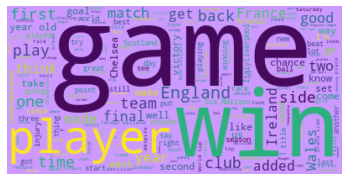

In [119]:
#create sport wordcloud

#simply call the created function
createWordCloud(df, 'sport', '#cc99ff')

tech WordCloud


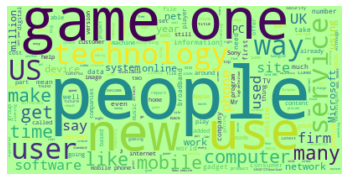

In [120]:
#create tech wordcloud

#simply call the created function
createWordCloud(df, 'tech', '#b3ff99')

entertainment WordCloud


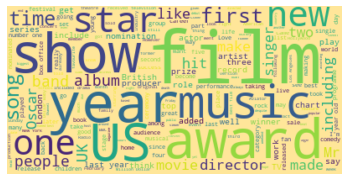

In [121]:
#create tech wordcloud

#simply call the created function
createWordCloud(df, 'entertainment', '#ffe699')

# **2.** Υλοποίηση Κατηγοριοποίησης (Classification)

In [35]:

#x1 = df[['id', 'content', 'title']]
#y1 = df[['category']]

X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(df['content'], df['category'], test_size = 0.2, stratify = df['category'], random_state = 34)
print(type(X1_train))

<class 'pandas.core.series.Series'>


In [36]:

#create numeric categories using the LabelEncoder and fit-transorm pipeline
le = preprocessing.LabelEncoder()
le.fit(y1_train)
label_train = le.transform(y1_train)
label_test = le.transform(y1_test)

test = label_binarize(y1_test, classes = ['business', 'politics', 'sport', 'entertainment', 'tech'])
test001  = label_binarize(y1_test, classes = ['business', 'politics', 'sport', 'entertainment', 'tech'])
#print(test)
#print(type(label_train))
#print(label_test)

In [37]:
def createPlot(classifier, X_test, test, opt):
    
    if(opt == 1):
        roc_predictions = classifier.predict_proba(X_test)
    else:
        roc_predictions = classifier.decision_function(X_test)
    
    n_classes = 5
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test[:, i], roc_predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test.ravel(), roc_predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [38]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X1_train)
X_test = vectorizer.transform(X1_test)

In [39]:
vectorizer = CountVectorizer()
Xbow_train = vectorizer.fit_transform(X1_train)
Xbow_test = vectorizer.transform(X1_test)

Tα παρακατω βασιζονται στο **TFIDF**

Support Vector Machines

In [9]:
#test the first SVC method
classifier = SVC(kernel='rbf', gamma='scale')
classifier.fit(X_train, label_train)

#scores = cross_val_score(classifier, X_train, label_train, cv = 10)
#print (np.mean(scores), scores)
precisions = cross_val_score(classifier, X_train, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)

f1s = cross_val_score(classifier, X_train, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

Precision 0.975329009936021 [0.97191849 1.         0.94909818 0.96391196 0.98253648 0.98766603
 0.98222222 0.94804987 0.9784792  0.98940767]
Recalls 0.9734645800813709 [0.96970651 1.         0.94628007 0.95975148 0.98123778 0.98729839
 0.97536657 0.94934938 0.97698529 0.98867034]
F1 0.974041645507101 [0.97011083 1.         0.94739562 0.96086207 0.98181183 0.98738871
 0.97789518 0.94835423 0.97765328 0.98894471]


Accuracy: 0.9662921348314607


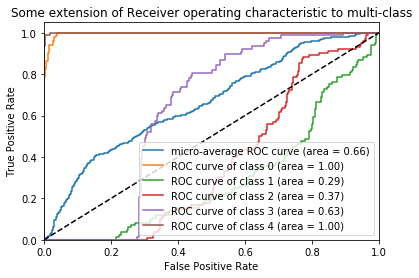

In [10]:
#test it
predictions = classifier.predict(X_test)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, X_test, test, 0)

In [18]:
#test the second one
classifier = SVC(kernel='linear', gamma='scale')
classifier.fit(X_train, label_train)

#scores = cross_val_score(classifier, X_train, label_train, cv = 10)
#print (np.mean(scores), scores)
precisions = cross_val_score(classifier, X_train, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, X_train, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

Precision 0.9776324324018215 [0.97203463 1.         0.95804    0.96128591 0.98729839 0.98766603
 0.98636364 0.95842532 0.97698529 0.98822511]
Recalls 0.9776152954780366 [0.96813294 1.         0.96016424 0.96348854 0.98729839 0.98729839
 0.98142717 0.96111408 0.97698529 0.9902439 ]
F1 0.9771456022144125 [0.96895563 1.         0.95872082 0.96070971 0.98729839 0.98738871
 0.98341249 0.95896046 0.97698529 0.98902453]


Accuracy: 0.9707865168539326


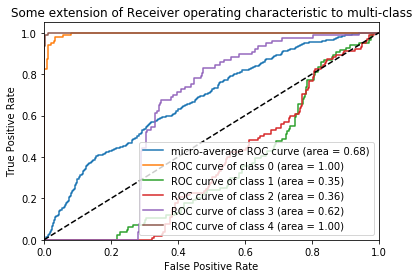

In [19]:
#test it
predictions = classifier.predict(X_test)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, X_test, test, 0)

In [20]:
#test the third one
classifier = SVC(kernel='poly', gamma='scale')
classifier.fit(X_train, label_train)

scores = cross_val_score(classifier, X_train, label_train, cv = 10)
print (np.mean(scores), scores)
precisions = cross_val_score(classifier, X_train, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, X_train, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

0.8775280898876405 [0.87640449 0.8988764  0.88202247 0.85955056 0.89325843 0.88764045
 0.89325843 0.85955056 0.84831461 0.87640449]
Precision 0.9158222951605923 [0.9141771  0.92711289 0.90003119 0.90271164 0.9318555  0.91823645
 0.93666667 0.91117512 0.90436508 0.91189133]
Recalls 0.8661377238507161 [0.862424   0.88999341 0.87298193 0.84658554 0.88215763 0.87589541
 0.88234702 0.84745707 0.83602189 0.86551332]
F1 0.8786531968833557 [0.87431377 0.90075185 0.88101443 0.86015701 0.89589001 0.88757317
 0.8975034  0.86214845 0.85011743 0.87706244]


Accuracy: 0.9101123595505618


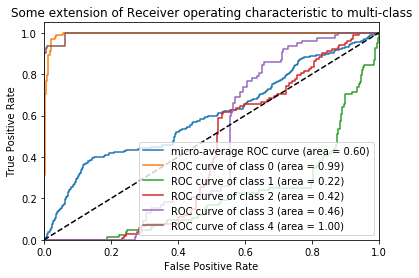

In [21]:
#test it
predictions = classifier.predict(X_test)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, X_test, test, 0)

Random Forests

In [64]:
classifier = RandomForestClassifier()
classifier.fit(X_train, label_train)

scores = cross_val_score(classifier, X_train, label_train, cv = 10)
print (np.mean(scores), scores)
precisions = cross_val_score(classifier, X_train, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, X_train, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

0.9539325842696631 [0.93820225 0.97191011 0.93820225 0.93820225 0.97191011 0.96067416
 0.96629213 0.93820225 0.96067416 0.95505618]
Precision 0.954328593097031 [0.94025068 0.98011364 0.936621   0.92994186 0.97281749 0.96724896
 0.96527778 0.93560327 0.94836643 0.96704482]
Recalls 0.9501784815456832 [0.92730402 0.97498778 0.93415886 0.94040886 0.96833456 0.95075489
 0.95015274 0.94147059 0.94367884 0.97053368]
F1 0.9541291926200712 [0.91908265 0.97565476 0.94188141 0.93187885 0.96540905 0.95927232
 0.9661567  0.95516868 0.97138417 0.95540334]


Accuracy: 0.9483146067415731


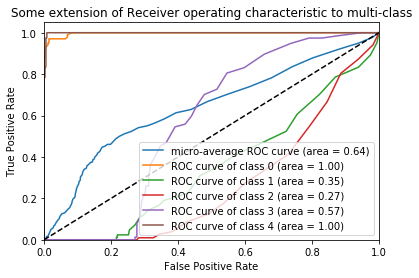

In [65]:
#test it
predictions = classifier.predict(X_test)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, X_test, test, 1)

 Naive Bayes

In [66]:
tempX = X_train.toarray()

classifier = GaussianNB()
classifier.fit(tempX, label_train)

scores = cross_val_score(classifier, tempX, label_train, cv = 10)
print (np.mean(scores), scores)
precisions = cross_val_score(classifier, tempX, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, tempX, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, tempX, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

0.9196629213483145 [0.8988764  0.93258427 0.92134831 0.91573034 0.93258427 0.91573034
 0.88764045 0.91573034 0.9494382  0.92696629]
Precision 0.9190585217881097 [0.90287302 0.93082469 0.92075654 0.91782872 0.93003651 0.91325323
 0.88652177 0.9126877  0.94773404 0.928069  ]
Recalls 0.9194277876768332 [0.89881506 0.93498245 0.91893209 0.91895191 0.93320727 0.91483338
 0.88455478 0.91283422 0.94783207 0.92933465]
F1 0.9178118890890478 [0.89553829 0.93198863 0.91848214 0.91451765 0.93134786 0.91265335
 0.8852375  0.91270307 0.9472473  0.9284031 ]


Accuracy: 0.9303370786516854


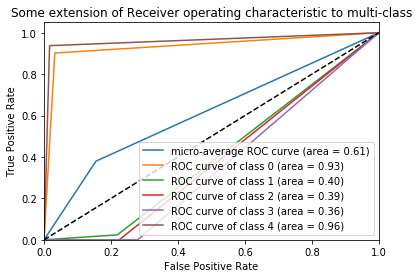

In [67]:
#test it
tempTest = X_test.toarray()

predictions = classifier.predict(tempTest)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, tempTest, test, 1)

Tα παρακατω βασιζονται στο **BoW**

In [76]:
#test the first SVC method
classifier = SVC(kernel='rbf', gamma='scale')
classifier.fit(Xbow_train, label_train)

#scores = cross_val_score(classifier, X_train, label_train, cv = 10)
#print (np.mean(scores), scores)
precisions = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)

f1s = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

Precision 0.9349786882241048 [0.95334596 0.94269841 0.91477943 0.89424441 0.93943332 0.94003841
 0.94480945 0.90523763 0.94654362 0.96865624]
Recalls 0.9266624420957855 [0.94469429 0.93276247 0.90249341 0.88139812 0.93298584 0.92632308
 0.93823046 0.90197578 0.94135535 0.96440563]
F1 0.9290124054263611 [0.94763802 0.93520079 0.90676102 0.88353859 0.93499603 0.93111443
 0.93989414 0.90225347 0.94257895 0.9661486 ]


Accuracy: 0.9325842696629213


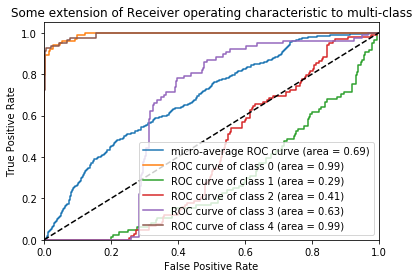

In [81]:
#test it
predictions = classifier.predict(Xbow_test)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, Xbow_test, test, 0)

In [91]:
#test the second one
classifier = SVC(kernel='linear', gamma='scale')
classifier.fit(Xbow_train, label_train)

#scores = cross_val_score(classifier, X_train, label_train, cv = 10)
#print (np.mean(scores), scores)
precisions = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

Precision 0.96033226886666 [0.96502194 0.96356314 0.94658207 0.92459284 0.96346873 0.98211982
 0.97311801 0.95283207 0.96714146 0.96488262]
Recalls 0.9603447255448921 [0.96482846 0.96015202 0.94765202 0.92733606 0.96346873 0.98242034
 0.97029913 0.95452763 0.96485294 0.96790994]
F1 0.9600006977405228 [0.96447785 0.96164882 0.94695307 0.92497506 0.96346873 0.9820223
 0.97150306 0.9530547  0.96579472 0.96610868]


Accuracy: 0.9573033707865168


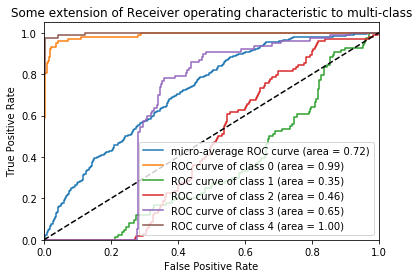

In [92]:
#test it
predictions = classifier.predict(Xbow_test)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, Xbow_test, test, 0)

In [93]:
#test the third one
classifier = SVC(kernel='poly', gamma='scale')
classifier.fit(Xbow_train, label_train)

#scores = cross_val_score(classifier, X_train, label_train, cv = 10)
#print (np.mean(scores), scores)
precisions = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

Precision 0.781831292710059 [0.80279985 0.77593998 0.76472727 0.76150272 0.77788799 0.77284366
 0.781185   0.74499894 0.81543337 0.82099415]
Recalls 0.6360139208533709 [0.69873176 0.60783221 0.66202137 0.60433073 0.67448934 0.61862304
 0.59765306 0.60173232 0.66234207 0.63238331]
F1 0.6423947164065653 [0.70618113 0.61636738 0.67570931 0.60524015 0.68465239 0.62859232
 0.58542889 0.61318582 0.66710631 0.64148346]


Accuracy: 0.647191011235955


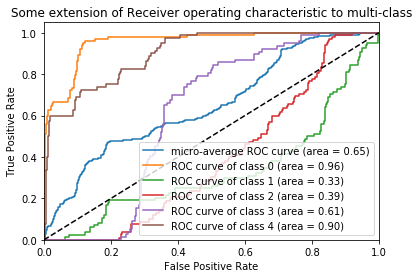

In [94]:
#test it
predictions = classifier.predict(Xbow_test)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, Xbow_test, test, 0)

In [89]:
classifier = RandomForestClassifier()
classifier.fit(Xbow_train, label_train)

#scores = cross_val_score(classifier, X_train, label_train, cv = 10)
#print (np.mean(scores), scores)
precisions = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, Xbow_train, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

Precision 0.9500298491460859 [0.93416039 0.94979188 0.92578743 0.92133758 0.96646828 0.95634881
 0.97826087 0.96391196 0.94694696 0.95728434]
Recalls 0.9484556488427571 [0.93961463 0.95601173 0.9226398  0.93671337 0.96365812 0.96247556
 0.96266496 0.9373262  0.96319972 0.94025241]
F1 0.9516972537297891 [0.93603512 0.97704977 0.92031351 0.9373033  0.9545539  0.95834169
 0.97219677 0.93728828 0.94729997 0.97659023]


Accuracy: 0.9550561797752809


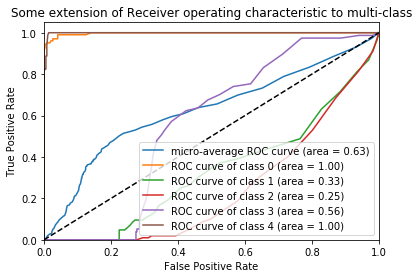

In [90]:
#test it
predictions = classifier.predict(Xbow_test)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, Xbow_test, test, 1)

In [95]:
tempXbow = Xbow_train.toarray()

classifier = GaussianNB()
classifier.fit(tempXbow, label_train)

scores = cross_val_score(classifier, tempXbow, label_train, cv = 10)
print (np.mean(scores), scores)
precisions = cross_val_score(classifier, tempXbow, label_train, cv=10, scoring='precision_macro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, tempXbow, label_train, cv=10, scoring='recall_macro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, tempXbow, label_train, cv=10, scoring='f1_macro')
print ('F1', np.mean(f1s), f1s)

0.9286516853932586 [0.91573034 0.9494382  0.93820225 0.92696629 0.93258427 0.92134831
 0.90449438 0.92696629 0.94382022 0.92696629]
Precision 0.9280278029556474 [0.92023857 0.94792957 0.9366388  0.92789818 0.93003651 0.92014978
 0.90213382 0.92380952 0.94337428 0.928069  ]
Recalls 0.9288447940902991 [0.91738788 0.9523605  0.93632236 0.92989057 0.93320727 0.92128499
 0.90174344 0.92371658 0.94319972 0.92933465]
F1 0.9270395630561691 [0.9126156  0.94958816 0.93582064 0.92594911 0.93134786 0.91932001
 0.90170495 0.9236845  0.94196169 0.9284031 ]


Accuracy: 0.9483146067415731


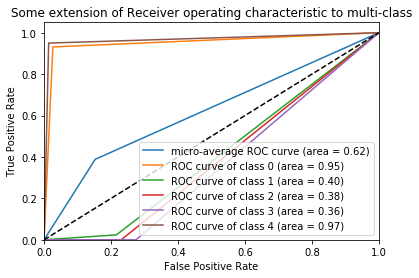

In [96]:
#test it
tempTestbow = Xbow_test.toarray()

predictions = classifier.predict(tempTestbow)
#get the accuracy
print ('Accuracy:', accuracy_score(label_test, predictions))
#print the roc plot 
createPlot(classifier, tempTestbow, test, 1)

Υλοποιηση του **K-Nearest Neighbor**

Για να υπολογισουμε την ομοιοτητα 2 εγγραφων, χρειαζομαστε μια αποσταση.
Στην υλοποιηση μας χρησιμοποιουμε την Ευκλειδεια αποσταση

In [72]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [78]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [84]:
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [85]:
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

In [88]:
ttrain = X_train.toarray()
ttest = X_test.toarray()

#predicted = k_nearest_neighbors(ttrain, ttest, 3)

#print(Xbow_train[0])

# 4. Υλοποίηση Συσταδοποίησης (Clustering)

Τα παρακατω αποτελεσματα βασιζονται στο **TF-IDF**

In [101]:
X_train_Norm = X_train.toarray()
X_train_Norm = preprocessing.normalize(X_train_Norm)
Χbow_train_Norm = Xbow_train.toarray()
Xbow_train_Norm = preprocessing.normalize(Χbow_train_Norm)
#print(X_train_Norm)

In [102]:
km = cluster.KMeans(n_clusters=5, init='k-means++')

In [103]:
cm = plt.get_cmap('rainbow', 5)
colors = [cm(i/5) for i in range(5)]

**TF-IDF** text representation

In [104]:
pca = PCA(n_components = 2).fit(X_train_Norm)
data2d = pca.transform(X_train_Norm)

In [111]:
pred = km.fit_predict(X_train_Norm)
centers2D = pca.transform(km.cluster_centers_)
print(centers2D)
print(pred)

[[-0.03088369  0.14317275]
 [ 0.17160262  0.02418353]
 [ 0.0056077  -0.11971878]
 [ 0.0303872  -0.08732581]
 [-0.06657061 -0.00876362]]
[0 4 3 ... 4 4 0]


Cluster Map


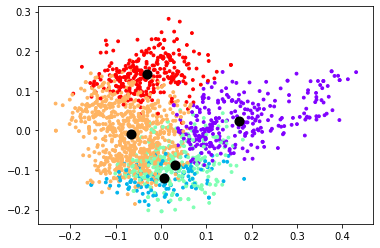

In [112]:
print("Cluster Map")

plt.scatter(data2d[:,0], data2d[:,1], c = [colors[c-1] for c in km.labels_], s = 8)

plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='o', s=50, linewidths=3, c = 'k')
plt.show()

Class Map


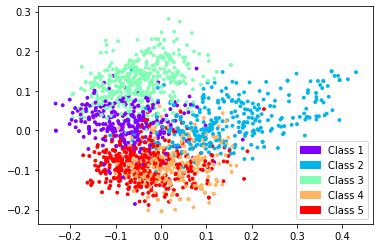

In [110]:
print ("Class Map")

plt.scatter(data2d[:,0], data2d[:,1], c=[colors[c-1] for c in label_train], s =8)

plt.legend(handles=[matplotlib.patches.Patch(color=colors[i], label='Class {}'.format(i+1)) for i in range(5)])

plt.show()

**BoW** text representation

In [113]:
pca = PCA(n_components = 2).fit(Xbow_train_Norm)
data2d = pca.transform(Xbow_train_Norm)

In [114]:
pred = km.fit_predict(Xbow_train_Norm)
centers2D = pca.transform(km.cluster_centers_)
print(centers2D)

[[ 0.10279703 -0.07148392]
 [ 0.13921038  0.10369481]
 [ 0.04364084 -0.02006013]
 [-0.0734171   0.14242552]
 [-0.11592423 -0.05117935]]


Cluster Map


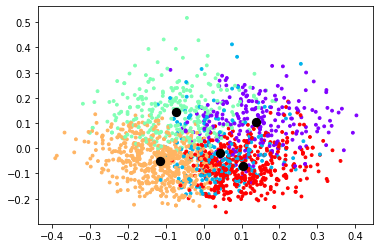

In [118]:
print("Cluster Map")
plt.scatter(data2d[:,0], data2d[:,1], c = [colors[c-1] for c in km.labels_], s = 8)

plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='o', s=40, linewidths=3, c = 'k')
plt.show()

Class Map


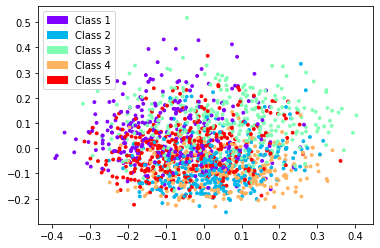

In [119]:
print ("Class Map")

plt.scatter(data2d[:,0], data2d[:,1], c=[colors[c-1] for c in label_train], s = 8)

plt.legend(handles=[matplotlib.patches.Patch(color=colors[i], label='Class {}'.format(i+1)) for i in range(5)])

plt.show()

**Word2vec** text representation

In [121]:
from gensim.models import Word2Vec

X_trainDF['tokenized_sents'] = X_trainDF.apply(lambda row: word_tokenize(row['content']), axis=1)
model = Word2Vec(X_trainDF['tokenized_sents'])

In [84]:
X= list(model.wv.vocab)

In [74]:
def get_average_vector(text):
    tokens = word_tokenize(text)
    return np.mean(np.array([model.wv[w] for w in tokens if w in model]), axis=0)

In [122]:
text_vecs = X_trainDF.apply(lambda x: (x['category'], get_average_vector(x['content'])), axis=1)
classes, vecs = list(zip(*text_vecs.values))

Class map


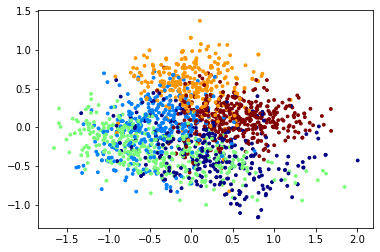

In [89]:
pca = PCA(n_components=2)
reduced_vecs = pca.fit_transform(vecs)
#print(classes)
le = preprocessing.LabelEncoder()
le.fit(classes)
label = le.transform(classes)
fig, ax = plt.subplots()

print("Class map")

cm = plt.get_cmap('jet', 5)
colors = [cm(i/5) for i in range(5)]
ax.scatter(reduced_vecs[:,0], reduced_vecs[:,1], c=[colors[c-1] for c in label], cmap='jet', s=8)
plt.show()

In [99]:
#normalize the data
vecs_Norm = preprocessing.normalize(vecs)

#fit to kmeans algorithm
pred = km.fit_predict(vecs)
#transform centers to 2d
centers2D = pca.transform(km.cluster_centers_)
print(centers2D)

[[-0.83914686 -0.1797715 ]
 [-0.0156608   0.48145786]
 [ 0.83084481  0.06856319]
 [-0.49805661 -0.11397679]
 [ 0.2783006  -0.40465355]]


Cluster Map


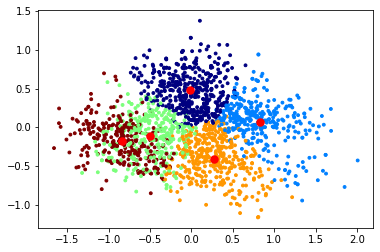

In [100]:
#plot the kmeans predictions

#make it 2d
pca = PCA(n_components=2)
reduced_vecs = pca.fit_transform(vecs)

print("Cluster Map")
plt.scatter(reduced_vecs[:,0], reduced_vecs[:,1], c = [colors[c-1] for c in km.labels_], s = 8)

plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='o', s=30, linewidths=3, c = 'r')
plt.show()